## Look at some DDF metrics -- for the EDF-S specifically

For metrics specific to the DDFs, there are a smaller set of specific metrics. 
There are certainly implications for the "rest of the survey" that we should evaluate, although generally these tend to follow the overall amount of time required for DDFs since the DDF time is distributed relatively evenly throughout the LSST.

In [2]:
# Some useful packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython

import rubin_sim.maf as maf

The `archive` module (from `rubin_sim.maf.archive.py`) provides functions to help deal with json/pandas data frames containing lists of the simulations in a given run, as well as typical sets of metrics. With these lists of simulations in each family, it's easier to isolate those metric results to compare the effect of varying that survey strategy. `archive` works with additional functions in `summary_plots` to then normalize and plot metric summary statistics.

In [3]:
# Download a dataframe of the archive information -- 
# this is a multi-index DF, and can be read in in multiple "versions"
# This version of the dataframe has one row per family, with multiple runs in lists in each row
# note that you can 'explode' this dataframe to be one row per run by doing families.explode('run')
families = maf.archive.get_family_descriptions('runs_v2.1.json')
families.head()

,description,version,reference,run,brief,filepath,url
family,,,,,,,
baseline,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,"[baseline_v2.1_10yrs, baseline_v2.0_10yrs, bas...","[v2.1 baseline (+Virgo, good seeing), v2.0 bas...","[fbs_2.1/baseline/baseline_v2.1_10yrs.db, fbs_...",[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,"[noroll_v2.0_10yrs, rolling_ns2_rw0.5_v2.0_10y...","[v2.0 baseline with no rolling, Rolling half-s...","[fbs_2.0/noroll/noroll_v2.0_10yrs.db, fbs_2.0/...",[http://epyc.astro.washington.edu/~lynnej/opsi...
triplets,**triplets** : These simulations add a third v...,2.0,baseline_v2.0_10yrs,"[presto_gap1.5_v2.0_10yrs, presto_gap2.0_v2.0_...","[Triples spaced 1.5 hours apart g+r,r+i,i+z in...","[fbs_2.0/presto/presto_gap1.5_v2.0_10yrs.db, f...",[http://epyc.astro.washington.edu/~lynnej/opsi...
long gaps no pairs,**long gaps no pairs** : The baseline survey s...,2.0,baseline_v2.0_10yrs,[long_gaps_np_nightsoff7_delayed1827_v2.0_10yr...,[Long gaps pairs every 7 nights starting after...,[fbs_2.0/long_gaps_nopair/long_gaps_np_nightso...,[http://epyc.astro.washington.edu/~lynnej/opsi...
bluer balance,**bluer balance** : The standard filter balanc...,2.0,baseline_v2.0_10yrs,"[bluer_indx0_v2.0_10yrs, bluer_indx1_v2.0_10yrs]","[More g - filter ratio in WFD of {'u': 0.07, '...","[fbs_2.0/bluer/bluer_indx0_v2.0_10yrs.db, fbs_...",[http://epyc.astro.washington.edu/~lynnej/opsi...


Read the summary stat csv file. 

These are the standard MAF summary stats (which may include something you use!) 
but you could join your own dataframe, as long as it covered all the relevant runs.
This gives us metric results to compare between the runs.

In [4]:
# Read the summary stat csv file
file_source = 'summary_2022_04_28.csv'
summaries = maf.archive.get_metric_summaries(summary_source=file_source)

In [5]:
# And get the metric subset lists that can help with pulling information out of the big summary dataframe
metrics_url = "https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json"
file_source = 'metric_sets.json'
metrics = maf.archive.get_metric_sets(file_source)
metrics.head()

metric  \
metric set metric                                                                                                  
radar      fONv MedianNvis fO All sky HealpixSlicer                     fONv MedianNvis fO All sky HealpixSlicer   
           Mean WeakLensingNvisits i band non-DD HealpixSl...  Mean WeakLensingNvisits i band non-DD HealpixS...   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2ptFoM ExgalM5_with_cuts i band non-DD year ...   
           Total detected SNNSNMetric_nSN  HealpixSlicer           Total detected SNNSNMetric_nSN  HealpixSlicer   
           TDEsPopMetric__some_color_pu  UserPointsSlicer         TDEsPopMetric__some_color_pu  UserPointsSlicer   

                                                              short_name  \
metric set metric                                                          
radar      fONv MedianNvis fO All sky HealpixSlicer             fONv_med   
           Mean WeakLensingNvisits i band non-DD HealpixSl...         WL   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2pt FoM   
           Total detected SNNSNMetric_nSN  HealpixSlicer            SNIa   
           TDEsPopMetric__some_color_pu  UserPointsSlicer            TDE   

                                                              short_names_norm  \
metric set metric                                                                
radar      fONv MedianNvis fO All sky HealpixSlicer                   fONv_med   
           Mean WeakLensingNvisits i band non-DD HealpixSl...               WL   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...        3x2pt FoM   
           Total detected SNNSNMetric_nSN  HealpixSlicer                  SNIa   
           TDEsPopMetric__some_color_pu  UserPointsSlicer                  TDE   

                                                              style  invert  \
metric set metric                                                             
radar      fONv MedianNvis fO All sky HealpixSlicer            None   False   
           Mean WeakLensingNvisits i band non-DD HealpixSl...  None   False   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  None   False   
           Total detected SNNSNMetric_nSN  HealpixSlicer       None   False   
           TDEsPopMetric__some_color_pu  UserPointsSlicer      None   False   

                                                                 mag  
metric set metric                                                     
radar      fONv MedianNvis fO All sky HealpixSlicer            False  
           Mean WeakLensingNvisits i band non-DD HealpixSl...  False  
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  False  
           Total detected SNNSNMetric_nSN  HealpixSlicer       False  
           TDEsPopMetric__some_color_pu  UserPointsSlicer      False

In [21]:
# We don't have metrics built into the metrics file above for the DDFs, so start putting them together now..


def order_by_filter(f):
    filterlist = ['u', 'g', 'r', 'i', 'z', 'y', '']
    if f in filterlist:
        return filterlist.index(f)
    else:
        return len(filterlist)
    
field = 'EDFS'
full_names = [m for m in summaries if f"DD:{field}" in m and ("Gap" in m or "Season" in m)]
idxs = [order_by_filter(f.split(field)[1].split('note')[0].strip(' ')) for f in full_names]
full_names = [f for _, f in sorted(zip(idxs, full_names))]
short_names = [f.split(' note')[0] for f in full_names]

# generally we want to invert inter-night gaps (shorter = better) and not invert season length
invert = [True for f in full_names]
invert[-1] = False

mset = maf.create_metric_set_df(f'{field} timing', full_names, short_names, invert=invert)

mset

metric  \
metric set  metric                                                                                                  
EDFS timing Mean Median Inter-Night Gap, EDFS u note like D...  Mean Median Inter-Night Gap, EDFS u note like ...   
            Mean Median Inter-Night Gap, EDFS g note like D...  Mean Median Inter-Night Gap, EDFS g note like ...   
            Mean Median Inter-Night Gap, EDFS r note like D...  Mean Median Inter-Night Gap, EDFS r note like ...   
            Mean Median Inter-Night Gap, EDFS i note like D...  Mean Median Inter-Night Gap, EDFS i note like ...   
            Mean Median Inter-Night Gap, EDFS z note like D...  Mean Median Inter-Night Gap, EDFS z note like ...   
            Mean Median Inter-Night Gap, EDFS y note like D...  Mean Median Inter-Night Gap, EDFS y note like ...   
            Mean Median Inter-Night Gap, EDFS note like DD:...  Mean Median Inter-Night Gap, EDFS note like DD...   
            Mean Median Season Length, EDFS note like DD:ED...  Mean Median Season Length, EDFS note like DD:E...   

                                                                                         short_name  \
metric set  metric                                                                                    
EDFS timing Mean Median Inter-Night Gap, EDFS u note like D...  Mean Median Inter-Night Gap, EDFS u   
            Mean Median Inter-Night Gap, EDFS g note like D...  Mean Median Inter-Night Gap, EDFS g   
            Mean Median Inter-Night Gap, EDFS r note like D...  Mean Median Inter-Night Gap, EDFS r   
            Mean Median Inter-Night Gap, EDFS i note like D...  Mean Median Inter-Night Gap, EDFS i   
            Mean Median Inter-Night Gap, EDFS z note like D...  Mean Median Inter-Night Gap, EDFS z   
            Mean Median Inter-Night Gap, EDFS y note like D...  Mean Median Inter-Night Gap, EDFS y   
            Mean Median Inter-Night Gap, EDFS note like DD:...    Mean Median Inter-Night Gap, EDFS   
            Mean Median Season Length, EDFS note like DD:ED...      Mean Median Season Length, EDFS   

                                                               style  invert  \
metric set  metric                                                             
EDFS timing Mean Median Inter-Night Gap, EDFS u note like D...     -    True   
            Mean Median Inter-Night Gap, EDFS g note like D...     -    True   
            Mean Median Inter-Night Gap, EDFS r note like D...     -    True   
            Mean Median Inter-Night Gap, EDFS i note like D...     -    True   
            Mean Median Inter-Night Gap, EDFS z note like D...     -    True   
            Mean Median Inter-Night Gap, EDFS y note like D...     -    True   
            Mean Median Inter-Night Gap, EDFS note like DD:...     -    True   
            Mean Median Season Length, EDFS note like DD:ED...     -   False   

                                                                  mag  
metric set  metric                                                     
EDFS timing Mean Median Inter-Night Gap, EDFS u note like D...  False  
            Mean Median Inter-Night Gap, EDFS g note like D...  False  
            Mean Median Inter-Night Gap, EDFS r note like D...  False  
            Mean Median Inter-Night Gap, EDFS i note like D...  False  
            Mean Median Inter-Night Gap, EDFS z note like D...  False  
            Mean Median Inter-Night Gap, EDFS y note like D...  False  
            Mean Median Inter-Night Gap, EDFS note like DD:...  False  
            Mean Median Season Length, EDFS note like DD:ED...  False

### Metric results

Using utilities from `archive` (to normalize the data frame and plot metrics), combined with the family information dataframe with the simulations in each family, we can pull up some plots for each family.

In [22]:
outDir = 'ddf_plots'
if not os.path.exists(outDir):
    os.mkdir(outDir)

def describe_family(family, mset):
    if not isinstance(family, list):
        family = [family]
    baseline_run = 'baseline_v2.1_10yrs'
    these_runs = families.explode('run').loc[family, 'run'].values
    if baseline_run not in these_runs:
        these_runs = np.concatenate([[baseline_run], these_runs])
    result = maf.archive.describe_families(
        families.loc[family, :],
        summary=summaries,
        table_metric_set=metrics.loc["short"],
        plot_metric_set=metrics.loc["area"],
        baseline_run=baseline_run,
    )
    # Make a non-normalized version
    metricnames = [m for m in mset['metric'] if 'Season' not in m]
    fig, ax = maf.plot_run_metric(  # pylint: disable=invalid-name
        summaries.loc[these_runs, metricnames], 
        metric_set=mset,
        baseline_run=None,
        vertical_quantity="value",
        horizontal_quantity="run",
        metric_label_map=mset['short_name'],
        shade_fraction=None,
    )
    lgd = plt.legend(loc=(1.01, 0.2), fancybox=True, numpoints=1, fontsize='medium')
    figwidth = min(10, len(these_runs))
    figwidth = max(figwidth, 15)
    fig.set_figwidth(figwidth)
    # Make a normalized version
    fig, ax = maf.plot_run_metric(  # pylint: disable=invalid-name
            summaries.loc[these_runs, mset['metric']], 
            metric_set=mset,
            baseline_run=baseline_run,
            vertical_quantity="value",
            horizontal_quantity="run",
            metric_label_map=mset['short_name']
        )
    ax.set_ylim(.1, 10)
    lgd = plt.legend(loc=(1.01, 0.2), fancybox=True, numpoints=1, fontsize='medium')
    figwidth = min(10, len(these_runs))
    figwidth = max(figwidth, 15)
    fig.set_figwidth(figwidth)
    d = summaries.loc[these_runs, mset['metric']]
    d = d.rename(columns=mset['short_name'], inplace=False)
    return d

---
**ddf season length** : This family investigates the effect of varying the season length within the DDF fields. `season length fraction` reflects how much of the available season is used -- 0.1 indicates that 10% of the available season is removed at each end (for a total of 80% of the available season used for observations), while 0.3 would indicate that 40% of the total possible season is used. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_season_length_slf0.10_v2.1_10yrs,DDF with season length fraction 0.10,11914.61,16855.53,2093356.0,836.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_season_length_slf0.15_v2.1_10yrs,DDF with season length fraction 0.15,11201.21,16874.00,2092507.0,833.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_season_length_slf0.20_v2.1_10yrs,DDF with season length fraction 0.20,11345.57,16880.71,2093596.0,833.0,54.0,68.0,179.0,180.0,158.0,164.0
ddf_season_length_slf0.25_v2.1_10yrs,DDF with season length fraction 0.25,10757.23,16800.14,2092586.0,831.0,54.0,68.0,177.0,180.0,158.0,164.0
ddf_season_length_slf0.30_v2.1_10yrs,DDF with season length fraction 0.30,10916.69,16844.62,2092932.0,832.0,53.0,68.0,178.0,180.0,157.0,164.0
ddf_season_length_slf0.35_v2.1_10yrs,DDF with season length fraction 0.35,10805.07,16759.85,2093751.0,831.0,54.0,68.0,177.0,181.0,157.0,164.0


---
**ddf double** : This family cuts the individual DDF sequences in half, resulting in brighter single night coadded depths, but a shorter interval of nights between visits. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_double_slf0.10_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.10",10139.51,16846.30,2076416.0,829.0,54.0,68.0,177.0,180.0,157.0,163.0
ddf_double_slf0.15_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.15",9390.86,16822.80,2074408.0,826.0,53.0,67.0,176.0,179.0,157.0,163.0
ddf_double_slf0.20_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.20",8974.57,16812.73,2074875.0,824.0,53.0,67.0,176.0,179.0,156.0,163.0
ddf_double_slf0.25_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.25",8723.62,16753.98,2074021.0,823.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.30_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.30",8758.87,16782.52,2074785.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.35_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.35",8866.30,16774.96,2074848.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0


---
**ddf quad** : This family cuts the individual DDF sequences by four, resulting in brighter single night coadded depths, but an even shorter interval of nights between visits.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_slf0.10_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.10",5892.68,16675.93,2041518.0,813.0,52.0,67.0,173.0,176.0,154.0,160.0
ddf_quad_slf0.15_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.15",5250.62,16743.91,2036950.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.20_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.20",5281.67,16673.41,2038440.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.25_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.25",4783.13,16671.73,2035980.0,807.0,52.0,66.0,173.0,175.0,153.0,159.0
ddf_quad_slf0.30_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.30",4919.94,16553.39,2037701.0,808.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.35_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.35",5682.86,16612.14,2042853.0,811.0,52.0,66.0,174.0,176.0,154.0,160.0


---
**ddf quad subfilter** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. However, here only some filters are used in each DDF sequence, alternating between active filters on different nights.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_subfilter_slf0.10_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.10",14253.72,16889.11,2067093.0,846.0,54.0,69.0,182.0,183.0,161.0,167.0
ddf_quad_subfilter_slf0.15_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.15",13943.19,16884.91,2064387.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.20_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.20",14117.76,16854.69,2065407.0,845.0,54.0,69.0,181.0,183.0,160.0,166.0
ddf_quad_subfilter_slf0.25_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.25",13831.56,16835.39,2064822.0,844.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.30_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.30",14104.33,16811.89,2066396.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.35_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.35",14408.99,16819.44,2068666.0,847.0,54.0,69.0,182.0,184.0,160.0,167.0


---
**ddf bright** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. In this family, the m5 limits for scheduling visits are relaxed, resulting in visits running more consistently throughout the lunar cycle even into bright time. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_bright_slf0.10_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.10",6401.29,16804.34,2044360.0,814.0,53.0,67.0,174.0,177.0,154.0,160.0
ddf_bright_slf0.15_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.15",5102.91,16773.28,2035970.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_bright_slf0.20_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.20",5191.03,16700.26,2039002.0,809.0,52.0,66.0,173.0,176.0,153.0,159.0
ddf_bright_slf0.25_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.25",4598.49,16672.57,2034445.0,806.0,52.0,66.0,172.0,175.0,152.0,159.0
ddf_bright_slf0.30_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.30",4640.45,16618.85,2036705.0,807.0,52.0,66.0,172.0,175.0,153.0,159.0
ddf_bright_slf0.35_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.35",5901.07,16648.23,2043294.0,812.0,52.0,66.0,174.0,176.0,154.0,160.0


---
**ddf dither** : This family varies the dithering pattern for the DDF sequences, changing the max translational dither from 0.01 to 3.5 degrees. Increasing dither sizes are expected to improve calibration, while decreasing dither sizes may improve final coadded depth over the smaller total observed area.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_dither_size_slf0.20_md0.01_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.01 deg,11361.52,16827.00,2093931.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_dither_size_slf0.20_md0.05_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.05 deg,11458.04,16874.84,2093546.0,834.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_dither_size_slf0.20_md0.10_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.10 deg,11406.00,16911.77,2093111.0,834.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_dither_size_slf0.20_md0.25_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.25 deg,11275.91,16771.60,2093397.0,833.0,54.0,68.0,178.0,181.0,157.0,164.0
ddf_dither_size_slf0.20_md0.50_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.50 deg,11531.06,16855.53,2093476.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_dither_size_slf0.20_md0.70_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.70 deg,11345.57,16880.71,2093596.0,833.0,54.0,68.0,179.0,180.0,158.0,164.0
ddf_dither_size_slf0.20_md1.00_v2.1_10yrs,DDFs with variable dither offsets - max dither 1.00 deg,11515.95,16880.71,2093546.0,834.0,54.0,68.0,178.0,180.0,158.0,164.0
ddf_dither_size_slf0.20_md1.50_v2.1_10yrs,DDFs with variable dither offsets - max dither 1.50 deg,11520.98,16872.32,2093778.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_dither_size_slf0.20_md2.50_v2.1_10yrs,DDFs with variable dither offsets - max dither 2.50 deg,11575.54,16820.28,2093050.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0


---
**ddf roll** : This family adds a rolling cadence to the DDFs, so that DD fields are observed more intensely in some years, less intensely in others.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_roll_slf0.20_v2.1_10yrs,Roll the DDF fields between years,11373.27,16830.36,2097302.0,833.0,53.0,68.0,178.0,181.0,158.0,165.0


---
**ddf accordian** : This family adds an "accordian" low/high rate over each season approach to DDF cadence. The edges of each season are observed at a "low" rate while the center of the season is observed at a faster "high" rate. Each simulation is identified by a total season length fraction (as in `ddf season`) with a similar low season fraction (`lsf`) within that and a low season rate (lsr). Thus `ddf_accourd_sf0.30_lsf0.4_lsr0.1_v2.1_10yrs` would have a fairly short overall season (40% of the available season), a long low season (80% - so 20% high season), and a small low season rate (0.1), leaving most DDF visits concentrated in the center of the season. Conversely, `ddf_accourd_sf0.10_lsf0.1_lsr0.5_v2.1_10yrs` would have a long overall season, a short low season, and a high rate during the low season, resulting in a very mild accordian effect. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_accourd_sf0.05_lsf0.1_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.1 low season rate",11620.86,16894.14,2092819.0,835.0,54.0,69.0,178.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.1_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.3 low season rate",12057.29,16928.55,2093029.0,836.0,54.0,69.0,179.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.1_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.5 low season rate",11988.47,16905.89,2093089.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.2_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.1 low season rate",11492.45,16875.68,2092685.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.2_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.3 low season rate",11685.49,16918.48,2092789.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.2_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.5 low season rate",11917.13,16948.70,2092217.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.3_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.1 low season rate",11043.43,16873.16,2092723.0,832.0,54.0,68.0,178.0,180.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.3_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.3 low season rate",11677.09,16854.69,2093005.0,835.0,54.0,68.0,179.0,180.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.3_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.5 low season rate",11989.31,16895.82,2092042.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0


---
**ddf old rot** : This family adds a validation or comparison option for the remainder of the v2.1 DDF simulations. In this family, the rotation angle is fixed so that rotTelPos is constant; in most v2.1 simulations, rotSkyPos is held fixed. Otherwise this family is similar to `ddf season length`, and uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_old_rot_slf0.10_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.10",12555.83,16830.36,2098086.0,838.0,54.0,69.0,179.0,181.0,159.0,166.0
ddf_old_rot_slf0.15_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.15",11909.58,16870.64,2096946.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_old_rot_slf0.20_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.20",12067.36,16855.53,2097655.0,836.0,54.0,69.0,178.0,181.0,158.0,165.0
ddf_old_rot_slf0.25_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.25",11191.14,16790.91,2096966.0,833.0,54.0,68.0,178.0,180.0,157.0,164.0
ddf_old_rot_slf0.30_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.30",11410.20,16811.05,2098048.0,833.0,54.0,68.0,178.0,180.0,158.0,165.0
ddf_old_rot_slf0.35_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.35",11520.14,16835.39,2097766.0,833.0,54.0,68.0,178.0,180.0,158.0,164.0


---
**ddf deep universal** : This family uses longer and more frequent nightly sequences for the DDFs. These sequences are described in a DESC DDF paper, and are roughly 41 visits per night every night during the season. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_deep_u_slf0.20_v2.1_10yrs,DESC deep universal DDF sequences,1735.66,16467.78,2046659.0,787.0,51.0,64.0,168.0,171.0,149.0,155.0


---
**ddf deep rolling** : This family is based on the `ddf deep universal` but adds a rolling cadence to the DDF fields. The rolling cadence simply observes each field for two seasons, and then stops, thus reducing the overall time requirement for the DDFs from the budget requested in `ddf deep universal`. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_deep_rolling_slf0.20_v2.1_10yrs,"DESC deep universal sequences, with rolling - each DDF observed for 2 seasons",16001.13,17062.0,2085627.0,856.0,56.0,70.0,183.0,185.0,162.0,169.0


metric,"Mean Median Inter-Night Gap, EDFS u","Mean Median Inter-Night Gap, EDFS g","Mean Median Inter-Night Gap, EDFS r","Mean Median Inter-Night Gap, EDFS i","Mean Median Inter-Night Gap, EDFS z","Mean Median Inter-Night Gap, EDFS y","Mean Median Inter-Night Gap, EDFS","Mean Median Season Length, EDFS"
run,,,,,,,,
baseline_v2.1_10yrs,2.953839,3.986703,3.973718,3.973123,29.455027,3.976269,3.897376,109.867325
ddf_season_length_slf0.10_v2.1_10yrs,29.949722,10.162794,10.826703,10.768502,20.811979,10.884972,9.929242,274.684801
ddf_season_length_slf0.15_v2.1_10yrs,26.938310,9.053635,9.077637,9.064342,17.969760,9.045545,8.945156,239.742349
ddf_season_length_slf0.20_v2.1_10yrs,23.848325,8.024465,8.026031,8.030567,15.077268,8.017964,7.118862,205.765109
ddf_season_length_slf0.25_v2.1_10yrs,19.920221,6.889671,6.860158,6.781388,8.959651,6.839608,6.012486,170.861363
...,...,...,...,...,...,...,...,...
ddf_old_rot_slf0.25_v2.1_10yrs,19.883947,6.814056,6.843229,6.742717,7.061674,6.771127,5.969174,171.660501
ddf_old_rot_slf0.30_v2.1_10yrs,6.101585,5.057089,5.069442,5.065253,5.981454,5.071850,4.920618,137.862798
ddf_old_rot_slf0.35_v2.1_10yrs,4.069258,4.032505,4.037567,4.035096,4.703470,4.033911,3.259923,105.461189


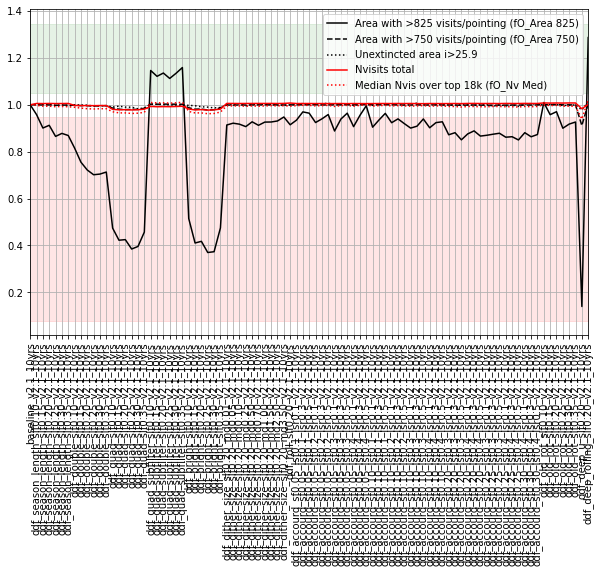

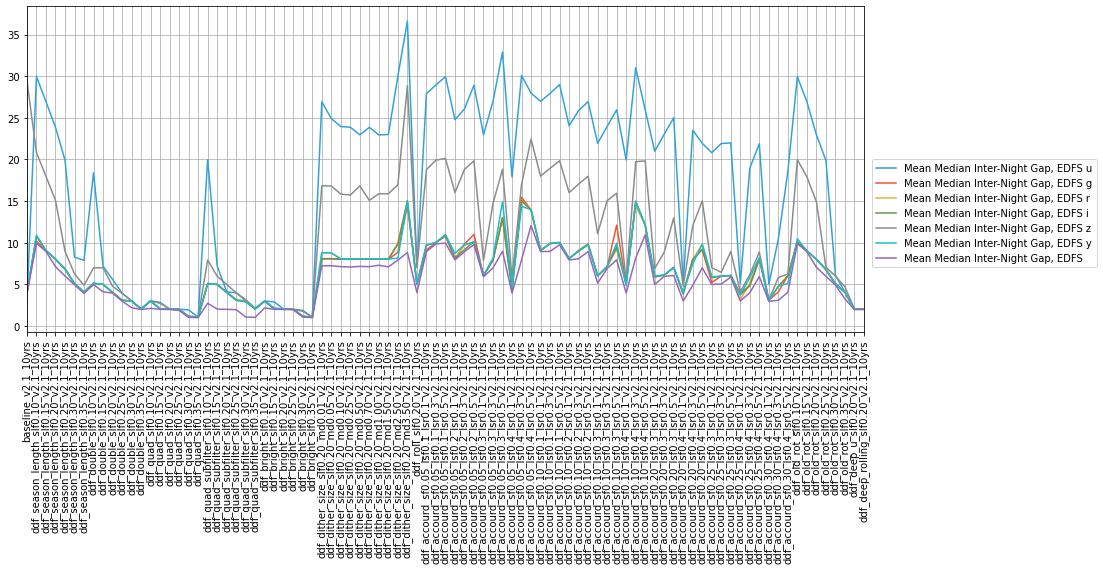

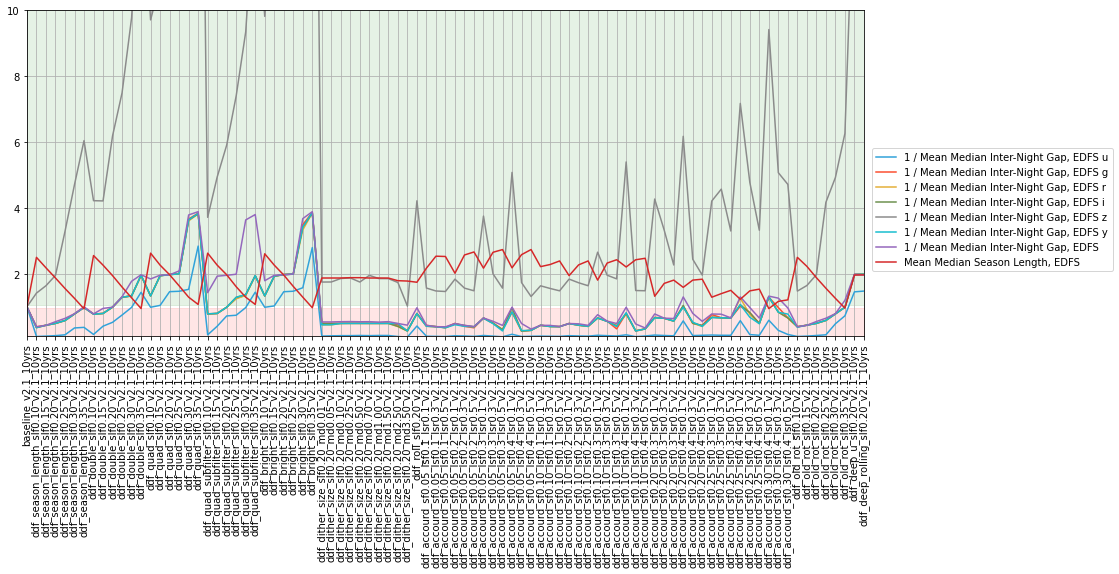

In [23]:
fam = [d for d in families.index 
       if 'ddf' in d and 'early deep' not in d and 'percent' not in d and 'euclid moved' not in d]
describe_family(fam, mset.loc['EDFS timing'])

---
**ddf season length** : This family investigates the effect of varying the season length within the DDF fields. `season length fraction` reflects how much of the available season is used -- 0.1 indicates that 10% of the available season is removed at each end (for a total of 80% of the available season used for observations), while 0.3 would indicate that 40% of the total possible season is used. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_season_length_slf0.10_v2.1_10yrs,DDF with season length fraction 0.10,11914.61,16855.53,2093356.0,836.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_season_length_slf0.15_v2.1_10yrs,DDF with season length fraction 0.15,11201.21,16874.00,2092507.0,833.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_season_length_slf0.20_v2.1_10yrs,DDF with season length fraction 0.20,11345.57,16880.71,2093596.0,833.0,54.0,68.0,179.0,180.0,158.0,164.0
ddf_season_length_slf0.25_v2.1_10yrs,DDF with season length fraction 0.25,10757.23,16800.14,2092586.0,831.0,54.0,68.0,177.0,180.0,158.0,164.0
ddf_season_length_slf0.30_v2.1_10yrs,DDF with season length fraction 0.30,10916.69,16844.62,2092932.0,832.0,53.0,68.0,178.0,180.0,157.0,164.0
ddf_season_length_slf0.35_v2.1_10yrs,DDF with season length fraction 0.35,10805.07,16759.85,2093751.0,831.0,54.0,68.0,177.0,181.0,157.0,164.0


---
**ddf double** : This family cuts the individual DDF sequences in half, resulting in brighter single night coadded depths, but a shorter interval of nights between visits. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_double_slf0.10_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.10",10139.51,16846.30,2076416.0,829.0,54.0,68.0,177.0,180.0,157.0,163.0
ddf_double_slf0.15_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.15",9390.86,16822.80,2074408.0,826.0,53.0,67.0,176.0,179.0,157.0,163.0
ddf_double_slf0.20_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.20",8974.57,16812.73,2074875.0,824.0,53.0,67.0,176.0,179.0,156.0,163.0
ddf_double_slf0.25_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.25",8723.62,16753.98,2074021.0,823.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.30_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.30",8758.87,16782.52,2074785.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.35_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.35",8866.30,16774.96,2074848.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0


---
**ddf quad** : This family cuts the individual DDF sequences by four, resulting in brighter single night coadded depths, but an even shorter interval of nights between visits.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_slf0.10_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.10",5892.68,16675.93,2041518.0,813.0,52.0,67.0,173.0,176.0,154.0,160.0
ddf_quad_slf0.15_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.15",5250.62,16743.91,2036950.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.20_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.20",5281.67,16673.41,2038440.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.25_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.25",4783.13,16671.73,2035980.0,807.0,52.0,66.0,173.0,175.0,153.0,159.0
ddf_quad_slf0.30_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.30",4919.94,16553.39,2037701.0,808.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.35_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.35",5682.86,16612.14,2042853.0,811.0,52.0,66.0,174.0,176.0,154.0,160.0


---
**ddf quad subfilter** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. However, here only some filters are used in each DDF sequence, alternating between active filters on different nights.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_subfilter_slf0.10_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.10",14253.72,16889.11,2067093.0,846.0,54.0,69.0,182.0,183.0,161.0,167.0
ddf_quad_subfilter_slf0.15_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.15",13943.19,16884.91,2064387.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.20_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.20",14117.76,16854.69,2065407.0,845.0,54.0,69.0,181.0,183.0,160.0,166.0
ddf_quad_subfilter_slf0.25_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.25",13831.56,16835.39,2064822.0,844.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.30_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.30",14104.33,16811.89,2066396.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.35_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.35",14408.99,16819.44,2068666.0,847.0,54.0,69.0,182.0,184.0,160.0,167.0


---
**ddf bright** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. In this family, the m5 limits for scheduling visits are relaxed, resulting in visits running more consistently throughout the lunar cycle even into bright time. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_bright_slf0.10_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.10",6401.29,16804.34,2044360.0,814.0,53.0,67.0,174.0,177.0,154.0,160.0
ddf_bright_slf0.15_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.15",5102.91,16773.28,2035970.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_bright_slf0.20_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.20",5191.03,16700.26,2039002.0,809.0,52.0,66.0,173.0,176.0,153.0,159.0
ddf_bright_slf0.25_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.25",4598.49,16672.57,2034445.0,806.0,52.0,66.0,172.0,175.0,152.0,159.0
ddf_bright_slf0.30_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.30",4640.45,16618.85,2036705.0,807.0,52.0,66.0,172.0,175.0,153.0,159.0
ddf_bright_slf0.35_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.35",5901.07,16648.23,2043294.0,812.0,52.0,66.0,174.0,176.0,154.0,160.0


---
**ddf roll** : This family adds a rolling cadence to the DDFs, so that DD fields are observed more intensely in some years, less intensely in others.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_roll_slf0.20_v2.1_10yrs,Roll the DDF fields between years,11373.27,16830.36,2097302.0,833.0,53.0,68.0,178.0,181.0,158.0,165.0


---
**ddf accordian** : This family adds an "accordian" low/high rate over each season approach to DDF cadence. The edges of each season are observed at a "low" rate while the center of the season is observed at a faster "high" rate. Each simulation is identified by a total season length fraction (as in `ddf season`) with a similar low season fraction (`lsf`) within that and a low season rate (lsr). Thus `ddf_accourd_sf0.30_lsf0.4_lsr0.1_v2.1_10yrs` would have a fairly short overall season (40% of the available season), a long low season (80% - so 20% high season), and a small low season rate (0.1), leaving most DDF visits concentrated in the center of the season. Conversely, `ddf_accourd_sf0.10_lsf0.1_lsr0.5_v2.1_10yrs` would have a long overall season, a short low season, and a high rate during the low season, resulting in a very mild accordian effect. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_accourd_sf0.05_lsf0.1_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.1 low season rate",11620.86,16894.14,2092819.0,835.0,54.0,69.0,178.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.1_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.3 low season rate",12057.29,16928.55,2093029.0,836.0,54.0,69.0,179.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.1_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.5 low season rate",11988.47,16905.89,2093089.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.2_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.1 low season rate",11492.45,16875.68,2092685.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.2_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.3 low season rate",11685.49,16918.48,2092789.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.2_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.5 low season rate",11917.13,16948.70,2092217.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.3_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.1 low season rate",11043.43,16873.16,2092723.0,832.0,54.0,68.0,178.0,180.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.3_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.3 low season rate",11677.09,16854.69,2093005.0,835.0,54.0,68.0,179.0,180.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.3_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.5 low season rate",11989.31,16895.82,2092042.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0


metric,"Mean Median Inter-Night Gap, EDFS u","Mean Median Inter-Night Gap, EDFS g","Mean Median Inter-Night Gap, EDFS r","Mean Median Inter-Night Gap, EDFS i","Mean Median Inter-Night Gap, EDFS z","Mean Median Inter-Night Gap, EDFS y","Mean Median Inter-Night Gap, EDFS","Mean Median Season Length, EDFS"
run,,,,,,,,
baseline_v2.1_10yrs,2.953839,3.986703,3.973718,3.973123,29.455027,3.976269,3.897376,109.867325
ddf_season_length_slf0.10_v2.1_10yrs,29.949722,10.162794,10.826703,10.768502,20.811979,10.884972,9.929242,274.684801
ddf_season_length_slf0.15_v2.1_10yrs,26.938310,9.053635,9.077637,9.064342,17.969760,9.045545,8.945156,239.742349
ddf_season_length_slf0.20_v2.1_10yrs,23.848325,8.024465,8.026031,8.030567,15.077268,8.017964,7.118862,205.765109
ddf_season_length_slf0.25_v2.1_10yrs,19.920221,6.889671,6.860158,6.781388,8.959651,6.839608,6.012486,170.861363
...,...,...,...,...,...,...,...,...
ddf_accourd_sf0.25_lsf0.4_lsr0.3_v2.1_10yrs,18.955001,4.887175,5.138753,4.827140,6.165967,5.824660,3.988189,162.897279
ddf_accourd_sf0.25_lsf0.4_lsr0.5_v2.1_10yrs,21.884641,8.025882,8.113366,8.050414,8.863507,8.194687,5.926966,168.661515
ddf_accourd_sf0.30_lsf0.4_lsr0.1_v2.1_10yrs,4.993226,3.094265,3.068630,3.069643,3.128807,3.054949,2.945109,103.715970


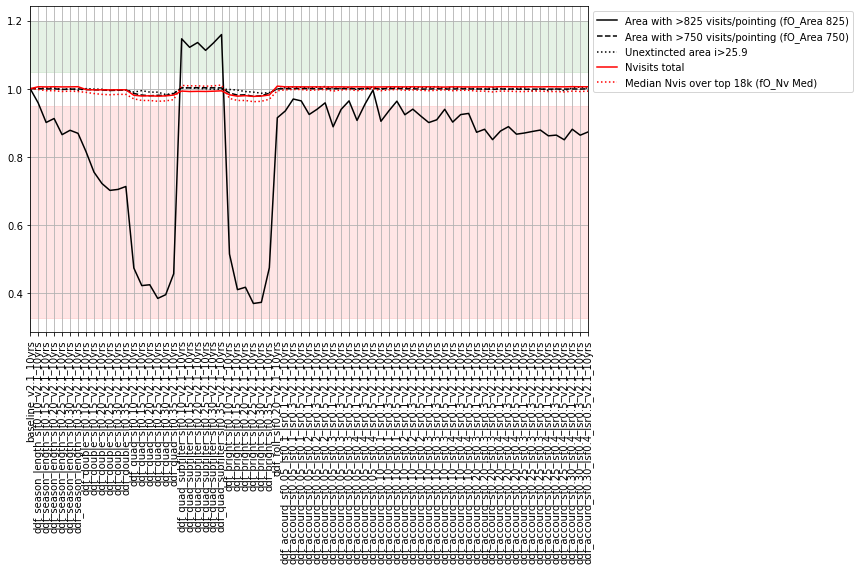

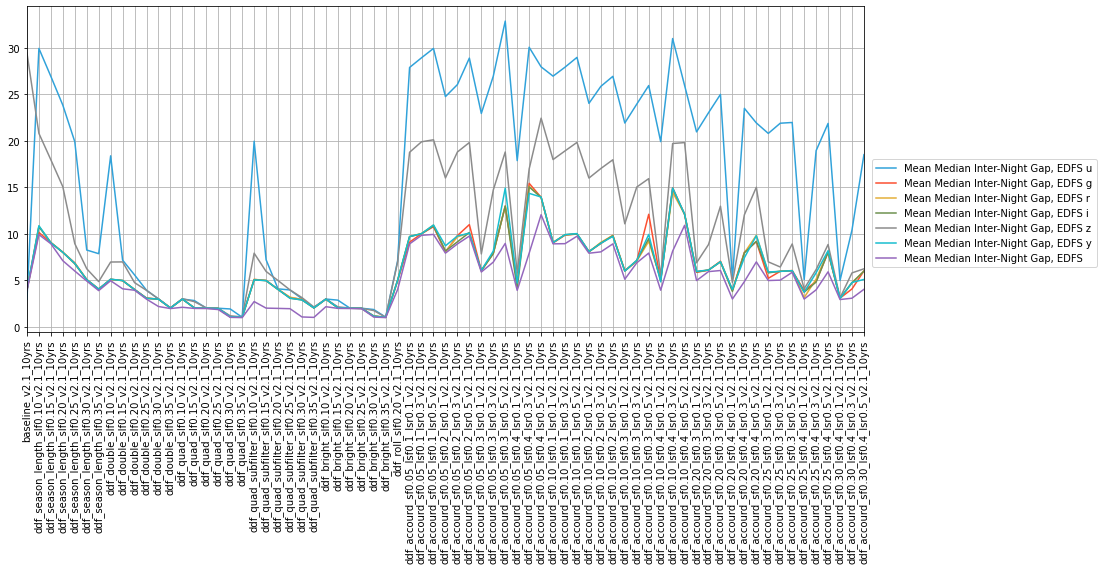

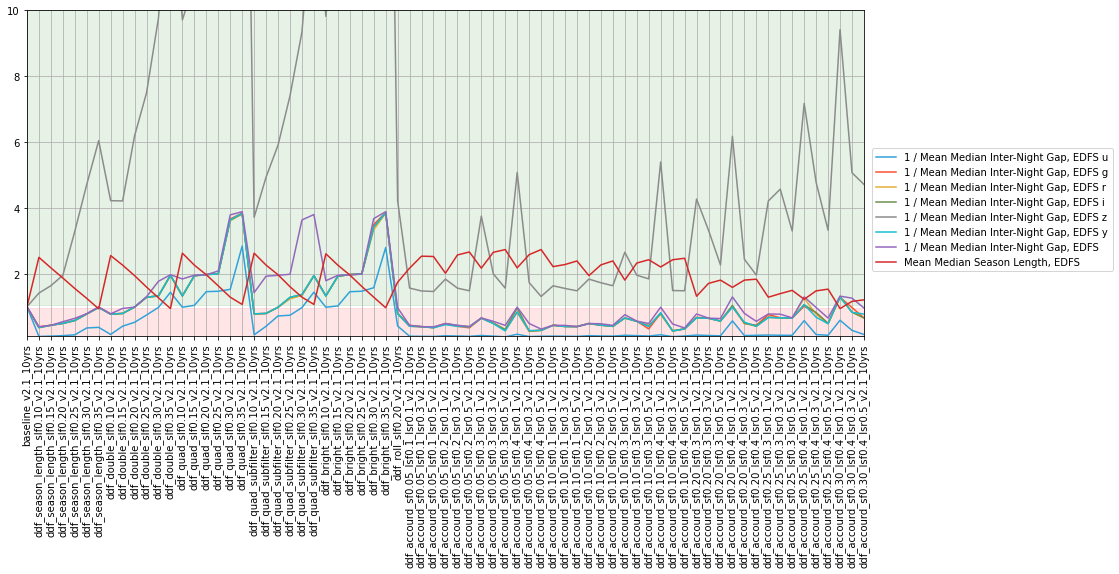

In [24]:
fam = ['ddf season length', 'ddf double', 'ddf quad', 'ddf quad subfilter', 'ddf bright', 
       'ddf roll', 'ddf accordian']
describe_family(fam, mset.loc['EDFS timing'])

In [31]:
def order_by_filter(f):
    filterlist = ['u', 'g', 'r', 'i', 'z', 'y', '']
    if f in filterlist:
        return filterlist.index(f)
    else:
        return len(filterlist)
    
field = 'COSMOS'
full_names = [m for m in summaries if f"DD:{field}" in m and ("Gap" in m or "Season" in m)]
idxs = [order_by_filter(f.split(field)[1].split('note')[0].strip(' ')) for f in full_names]
full_names = [f for _, f in sorted(zip(idxs, full_names))]
short_names = [f.split(' note')[0] for f in full_names]

# generally we want to invert inter-night gaps (shorter = better) and not invert season length
invert = [True for f in full_names]
invert[-1] = False


mset = pd.concat([mset, maf.create_metric_set_df(f'{field} timing', full_names, short_names, invert=invert)])

In [32]:
mset

metric  \
metric set    metric                                                                                                  
EDFS timing   Mean Median Inter-Night Gap, EDFS u note like D...  Mean Median Inter-Night Gap, EDFS u note like ...   
              Mean Median Inter-Night Gap, EDFS g note like D...  Mean Median Inter-Night Gap, EDFS g note like ...   
              Mean Median Inter-Night Gap, EDFS r note like D...  Mean Median Inter-Night Gap, EDFS r note like ...   
              Mean Median Inter-Night Gap, EDFS i note like D...  Mean Median Inter-Night Gap, EDFS i note like ...   
              Mean Median Inter-Night Gap, EDFS z note like D...  Mean Median Inter-Night Gap, EDFS z note like ...   
              Mean Median Inter-Night Gap, EDFS y note like D...  Mean Median Inter-Night Gap, EDFS y note like ...   
              Mean Median Inter-Night Gap, EDFS note like DD:...  Mean Median Inter-Night Gap, EDFS note like DD...   
              Mean Median Season Length, EDFS note like DD:ED...  Mean Median Season Length, EDFS note like DD:E...   
COSMOS timing Mean Median Inter-Night Gap, COSMOS u note like...  Mean Median Inter-Night Gap, COSMOS u note lik...   
              Mean Median Inter-Night Gap, COSMOS g note like...  Mean Median Inter-Night Gap, COSMOS g note lik...   
              Mean Median Inter-Night Gap, COSMOS r note like...  Mean Median Inter-Night Gap, COSMOS r note lik...   
              Mean Median Inter-Night Gap, COSMOS i note like...  Mean Median Inter-Night Gap, COSMOS i note lik...   
              Mean Median Inter-Night Gap, COSMOS z note like...  Mean Median Inter-Night Gap, COSMOS z note lik...   
              Mean Median Inter-Night Gap, COSMOS y note like...  Mean Median Inter-Night Gap, COSMOS y note lik...   
              Mean Median Inter-Night Gap, COSMOS note like D...  Mean Median Inter-Night Gap, COSMOS note like ...   
              Mean Median Season Length, COSMOS note like DD:...  Mean Median Season Length, COSMOS note like DD...   

                                                                                             short_name  \
metric set    metric                                                                                      
EDFS timing   Mean Median Inter-Night Gap, EDFS u note like D...    Mean Median Inter-Night Gap, EDFS u   
              Mean Median Inter-Night Gap, EDFS g note like D...    Mean Median Inter-Night Gap, EDFS g   
              Mean Median Inter-Night Gap, EDFS r note like D...    Mean Median Inter-Night Gap, EDFS r   
              Mean Median Inter-Night Gap, EDFS i note like D...    Mean Median Inter-Night Gap, EDFS i   
              Mean Median Inter-Night Gap, EDFS z note like D...    Mean Median Inter-Night Gap, EDFS z   
              Mean Median Inter-Night Gap, EDFS y note like D...    Mean Median Inter-Night Gap, EDFS y   
              Mean Median Inter-Night Gap, EDFS note like DD:...      Mean Median Inter-Night Gap, EDFS   
              Mean Median Season Length, EDFS note like DD:ED...        Mean Median Season Length, EDFS   
COSMOS timing Mean Median Inter-Night Gap, COSMOS u note like...  Mean Median Inter-Night Gap, COSMOS u   
              Mean Median Inter-Night Gap, COSMOS g note like...  Mean Median Inter-Night Gap, COSMOS g   
              Mean Median Inter-Night Gap, COSMOS r note like...  Mean Median Inter-Night Gap, COSMOS r   
              Mean Median Inter-Night Gap, COSMOS i note like...  Mean Median Inter-Night Gap, COSMOS i   
              Mean Median Inter-Night Gap, COSMOS z note like...  Mean Median Inter-Night Gap, COSMOS z   
              Mean Median Inter-Night Gap, COSMOS y note like...  Mean Median Inter-Night Gap, COSMOS y   
              Mean Median Inter-Night Gap, COSMOS note like D...    Mean Median Inter-Night Gap, COSMOS   
              Mean Median Season Length, COSMOS note like DD:...      Mean Median Season Length, COSMOS   

                                       

---
**ddf season length** : This family investigates the effect of varying the season length within the DDF fields. `season length fraction` reflects how much of the available season is used -- 0.1 indicates that 10% of the available season is removed at each end (for a total of 80% of the available season used for observations), while 0.3 would indicate that 40% of the total possible season is used. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_season_length_slf0.10_v2.1_10yrs,DDF with season length fraction 0.10,11914.61,16855.53,2093356.0,836.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_season_length_slf0.15_v2.1_10yrs,DDF with season length fraction 0.15,11201.21,16874.00,2092507.0,833.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_season_length_slf0.20_v2.1_10yrs,DDF with season length fraction 0.20,11345.57,16880.71,2093596.0,833.0,54.0,68.0,179.0,180.0,158.0,164.0
ddf_season_length_slf0.25_v2.1_10yrs,DDF with season length fraction 0.25,10757.23,16800.14,2092586.0,831.0,54.0,68.0,177.0,180.0,158.0,164.0
ddf_season_length_slf0.30_v2.1_10yrs,DDF with season length fraction 0.30,10916.69,16844.62,2092932.0,832.0,53.0,68.0,178.0,180.0,157.0,164.0
ddf_season_length_slf0.35_v2.1_10yrs,DDF with season length fraction 0.35,10805.07,16759.85,2093751.0,831.0,54.0,68.0,177.0,181.0,157.0,164.0


---
**ddf double** : This family cuts the individual DDF sequences in half, resulting in brighter single night coadded depths, but a shorter interval of nights between visits. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_double_slf0.10_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.10",10139.51,16846.30,2076416.0,829.0,54.0,68.0,177.0,180.0,157.0,163.0
ddf_double_slf0.15_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.15",9390.86,16822.80,2074408.0,826.0,53.0,67.0,176.0,179.0,157.0,163.0
ddf_double_slf0.20_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.20",8974.57,16812.73,2074875.0,824.0,53.0,67.0,176.0,179.0,156.0,163.0
ddf_double_slf0.25_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.25",8723.62,16753.98,2074021.0,823.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.30_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.30",8758.87,16782.52,2074785.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.35_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.35",8866.30,16774.96,2074848.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0


---
**ddf quad** : This family cuts the individual DDF sequences by four, resulting in brighter single night coadded depths, but an even shorter interval of nights between visits.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_slf0.10_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.10",5892.68,16675.93,2041518.0,813.0,52.0,67.0,173.0,176.0,154.0,160.0
ddf_quad_slf0.15_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.15",5250.62,16743.91,2036950.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.20_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.20",5281.67,16673.41,2038440.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.25_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.25",4783.13,16671.73,2035980.0,807.0,52.0,66.0,173.0,175.0,153.0,159.0
ddf_quad_slf0.30_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.30",4919.94,16553.39,2037701.0,808.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.35_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.35",5682.86,16612.14,2042853.0,811.0,52.0,66.0,174.0,176.0,154.0,160.0


---
**ddf quad subfilter** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. However, here only some filters are used in each DDF sequence, alternating between active filters on different nights.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_subfilter_slf0.10_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.10",14253.72,16889.11,2067093.0,846.0,54.0,69.0,182.0,183.0,161.0,167.0
ddf_quad_subfilter_slf0.15_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.15",13943.19,16884.91,2064387.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.20_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.20",14117.76,16854.69,2065407.0,845.0,54.0,69.0,181.0,183.0,160.0,166.0
ddf_quad_subfilter_slf0.25_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.25",13831.56,16835.39,2064822.0,844.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.30_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.30",14104.33,16811.89,2066396.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.35_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.35",14408.99,16819.44,2068666.0,847.0,54.0,69.0,182.0,184.0,160.0,167.0


---
**ddf bright** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. In this family, the m5 limits for scheduling visits are relaxed, resulting in visits running more consistently throughout the lunar cycle even into bright time. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_bright_slf0.10_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.10",6401.29,16804.34,2044360.0,814.0,53.0,67.0,174.0,177.0,154.0,160.0
ddf_bright_slf0.15_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.15",5102.91,16773.28,2035970.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_bright_slf0.20_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.20",5191.03,16700.26,2039002.0,809.0,52.0,66.0,173.0,176.0,153.0,159.0
ddf_bright_slf0.25_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.25",4598.49,16672.57,2034445.0,806.0,52.0,66.0,172.0,175.0,152.0,159.0
ddf_bright_slf0.30_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.30",4640.45,16618.85,2036705.0,807.0,52.0,66.0,172.0,175.0,153.0,159.0
ddf_bright_slf0.35_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.35",5901.07,16648.23,2043294.0,812.0,52.0,66.0,174.0,176.0,154.0,160.0


---
**ddf roll** : This family adds a rolling cadence to the DDFs, so that DD fields are observed more intensely in some years, less intensely in others.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_roll_slf0.20_v2.1_10yrs,Roll the DDF fields between years,11373.27,16830.36,2097302.0,833.0,53.0,68.0,178.0,181.0,158.0,165.0


---
**ddf accordian** : This family adds an "accordian" low/high rate over each season approach to DDF cadence. The edges of each season are observed at a "low" rate while the center of the season is observed at a faster "high" rate. Each simulation is identified by a total season length fraction (as in `ddf season`) with a similar low season fraction (`lsf`) within that and a low season rate (lsr). Thus `ddf_accourd_sf0.30_lsf0.4_lsr0.1_v2.1_10yrs` would have a fairly short overall season (40% of the available season), a long low season (80% - so 20% high season), and a small low season rate (0.1), leaving most DDF visits concentrated in the center of the season. Conversely, `ddf_accourd_sf0.10_lsf0.1_lsr0.5_v2.1_10yrs` would have a long overall season, a short low season, and a high rate during the low season, resulting in a very mild accordian effect. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_accourd_sf0.05_lsf0.1_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.1 low season rate",11620.86,16894.14,2092819.0,835.0,54.0,69.0,178.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.1_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.3 low season rate",12057.29,16928.55,2093029.0,836.0,54.0,69.0,179.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.1_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.5 low season rate",11988.47,16905.89,2093089.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.2_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.1 low season rate",11492.45,16875.68,2092685.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.2_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.3 low season rate",11685.49,16918.48,2092789.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.2_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.5 low season rate",11917.13,16948.70,2092217.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.3_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.1 low season rate",11043.43,16873.16,2092723.0,832.0,54.0,68.0,178.0,180.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.3_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.3 low season rate",11677.09,16854.69,2093005.0,835.0,54.0,68.0,179.0,180.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.3_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.5 low season rate",11989.31,16895.82,2092042.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0


metric,"Mean Median Inter-Night Gap, COSMOS u","Mean Median Inter-Night Gap, COSMOS g","Mean Median Inter-Night Gap, COSMOS r","Mean Median Inter-Night Gap, COSMOS i","Mean Median Inter-Night Gap, COSMOS z","Mean Median Inter-Night Gap, COSMOS y","Mean Median Inter-Night Gap, COSMOS","Mean Median Season Length, COSMOS"
run,,,,,,,,
baseline_v2.1_10yrs,2.952528,3.001583,3.004264,3.010783,25.979264,2.997243,2.963547,166.735914
ddf_season_length_slf0.10_v2.1_10yrs,22.331641,10.011968,10.077138,10.002839,16.099706,10.045406,9.101207,232.651667
ddf_season_length_slf0.15_v2.1_10yrs,25.920845,9.009509,9.035102,8.991276,15.125277,9.015167,8.026945,231.656569
ddf_season_length_slf0.20_v2.1_10yrs,22.904141,7.990280,7.992138,7.839233,12.837749,7.970917,6.955047,198.174269
ddf_season_length_slf0.25_v2.1_10yrs,17.958651,6.908486,6.935624,6.072298,10.755641,6.158066,5.863901,171.261414
...,...,...,...,...,...,...,...,...
ddf_accourd_sf0.25_lsf0.4_lsr0.3_v2.1_10yrs,14.061302,4.756952,4.795441,4.074356,6.783549,4.748405,3.955379,165.163345
ddf_accourd_sf0.25_lsf0.4_lsr0.5_v2.1_10yrs,18.809684,5.742260,5.757519,5.062637,8.717237,5.731167,4.778256,170.651945
ddf_accourd_sf0.30_lsf0.4_lsr0.1_v2.1_10yrs,3.028817,2.990921,2.993989,2.987870,2.991689,2.987343,2.864634,125.694284


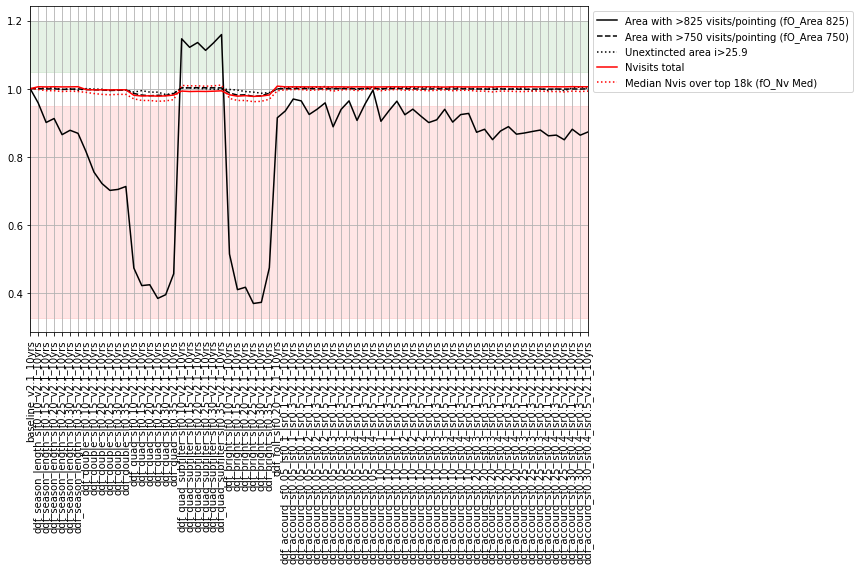

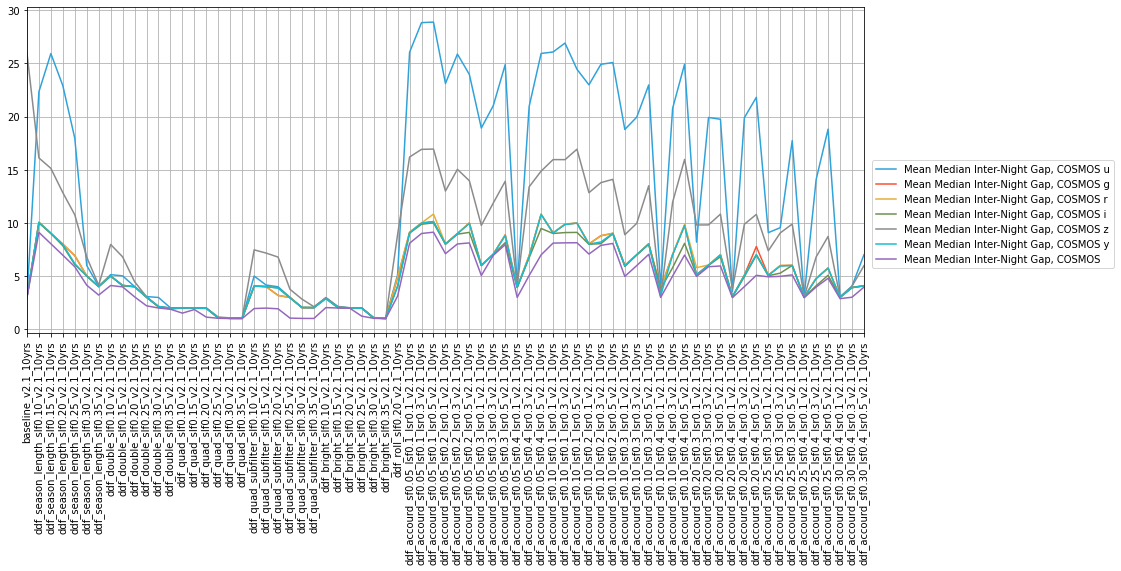

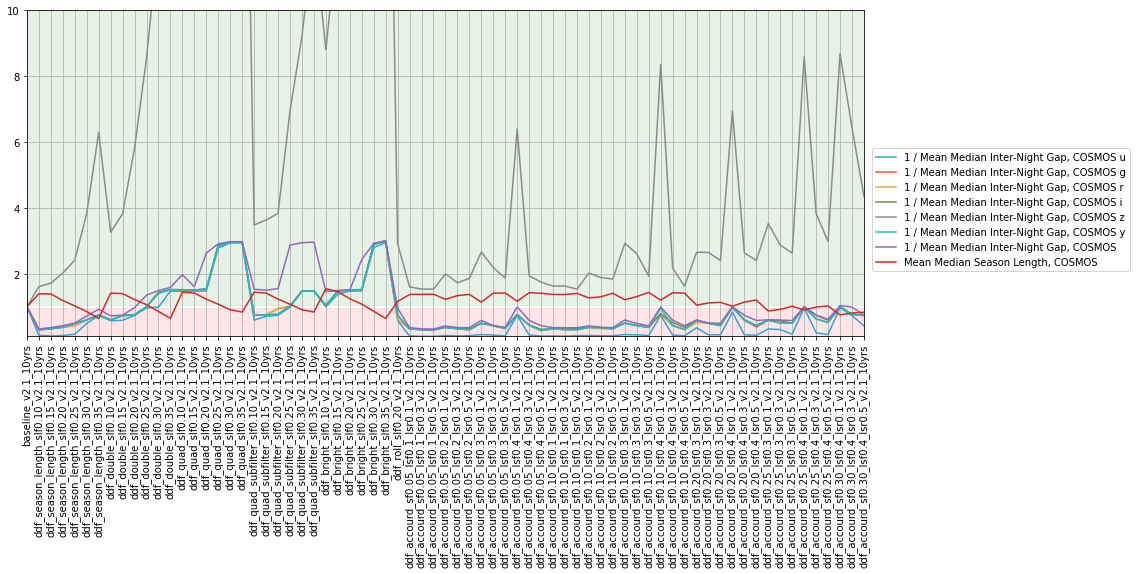

In [33]:
fam = ['ddf season length', 'ddf double', 'ddf quad', 'ddf quad subfilter', 'ddf bright', 
       'ddf roll', 'ddf accordian']
describe_family(fam, mset.loc['COSMOS timing'])